# Logistic regression

## Overview

Logistic regression finds correlations in a discrete (binary) dependent variable based on one or more independent continuous variables.

If we try to apply what we've learned in Linear Regression here, it will not look helpful.

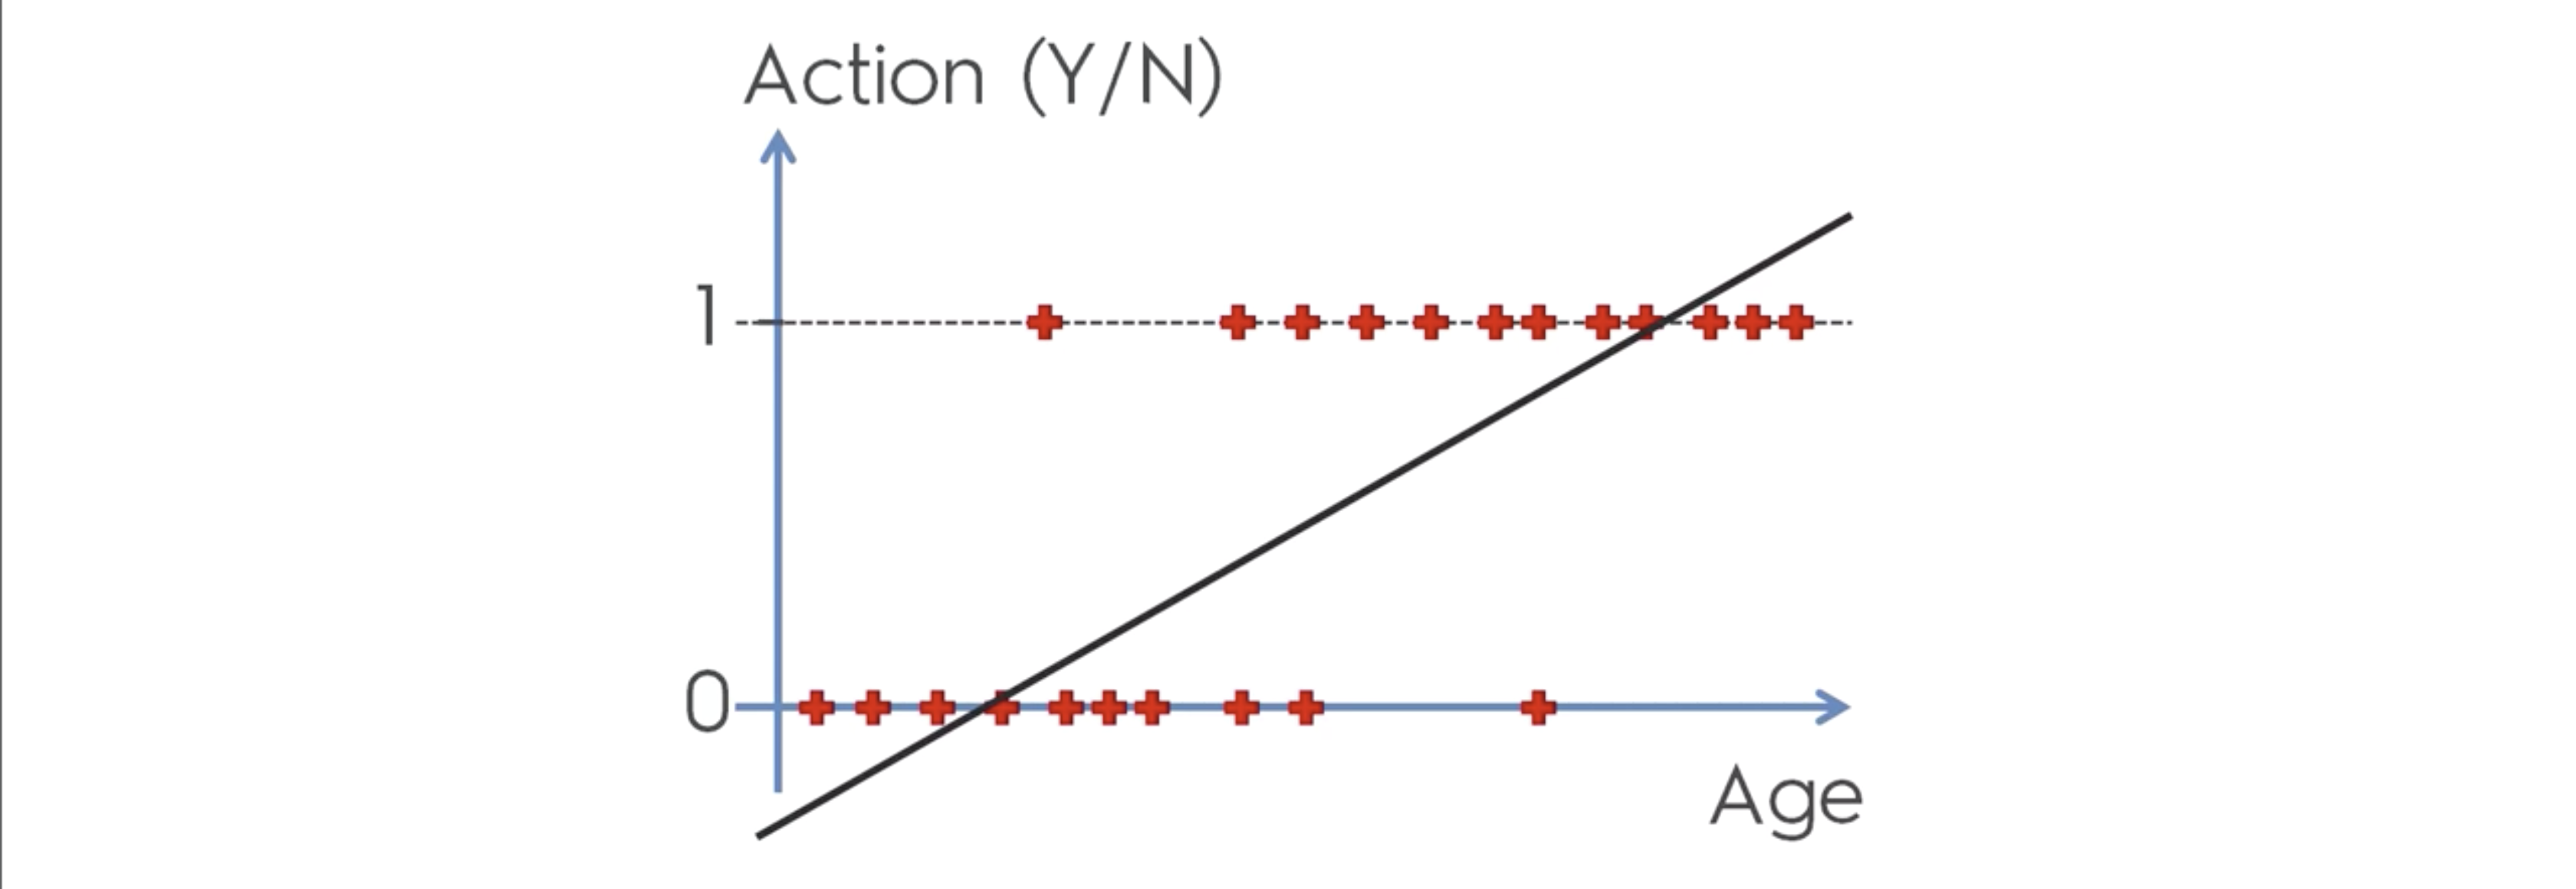

However, rather than the line directly predicting $\hat{y}$, let's frame the problem as an attempt to estimate the probability of someone performing a yes/no action based on age.

We can think of the attempted linear fit as trying to capture the increasing probability, from 0 to 1, with age. Obviously probabilities cannot be less than 0 or greater than 1;

\begin{equation}
    0 \le p \le 1.
\end{equation}

So, a naive attempt to model this situation, might be to just flatten out the fitted line so it conforms to the allowed range.

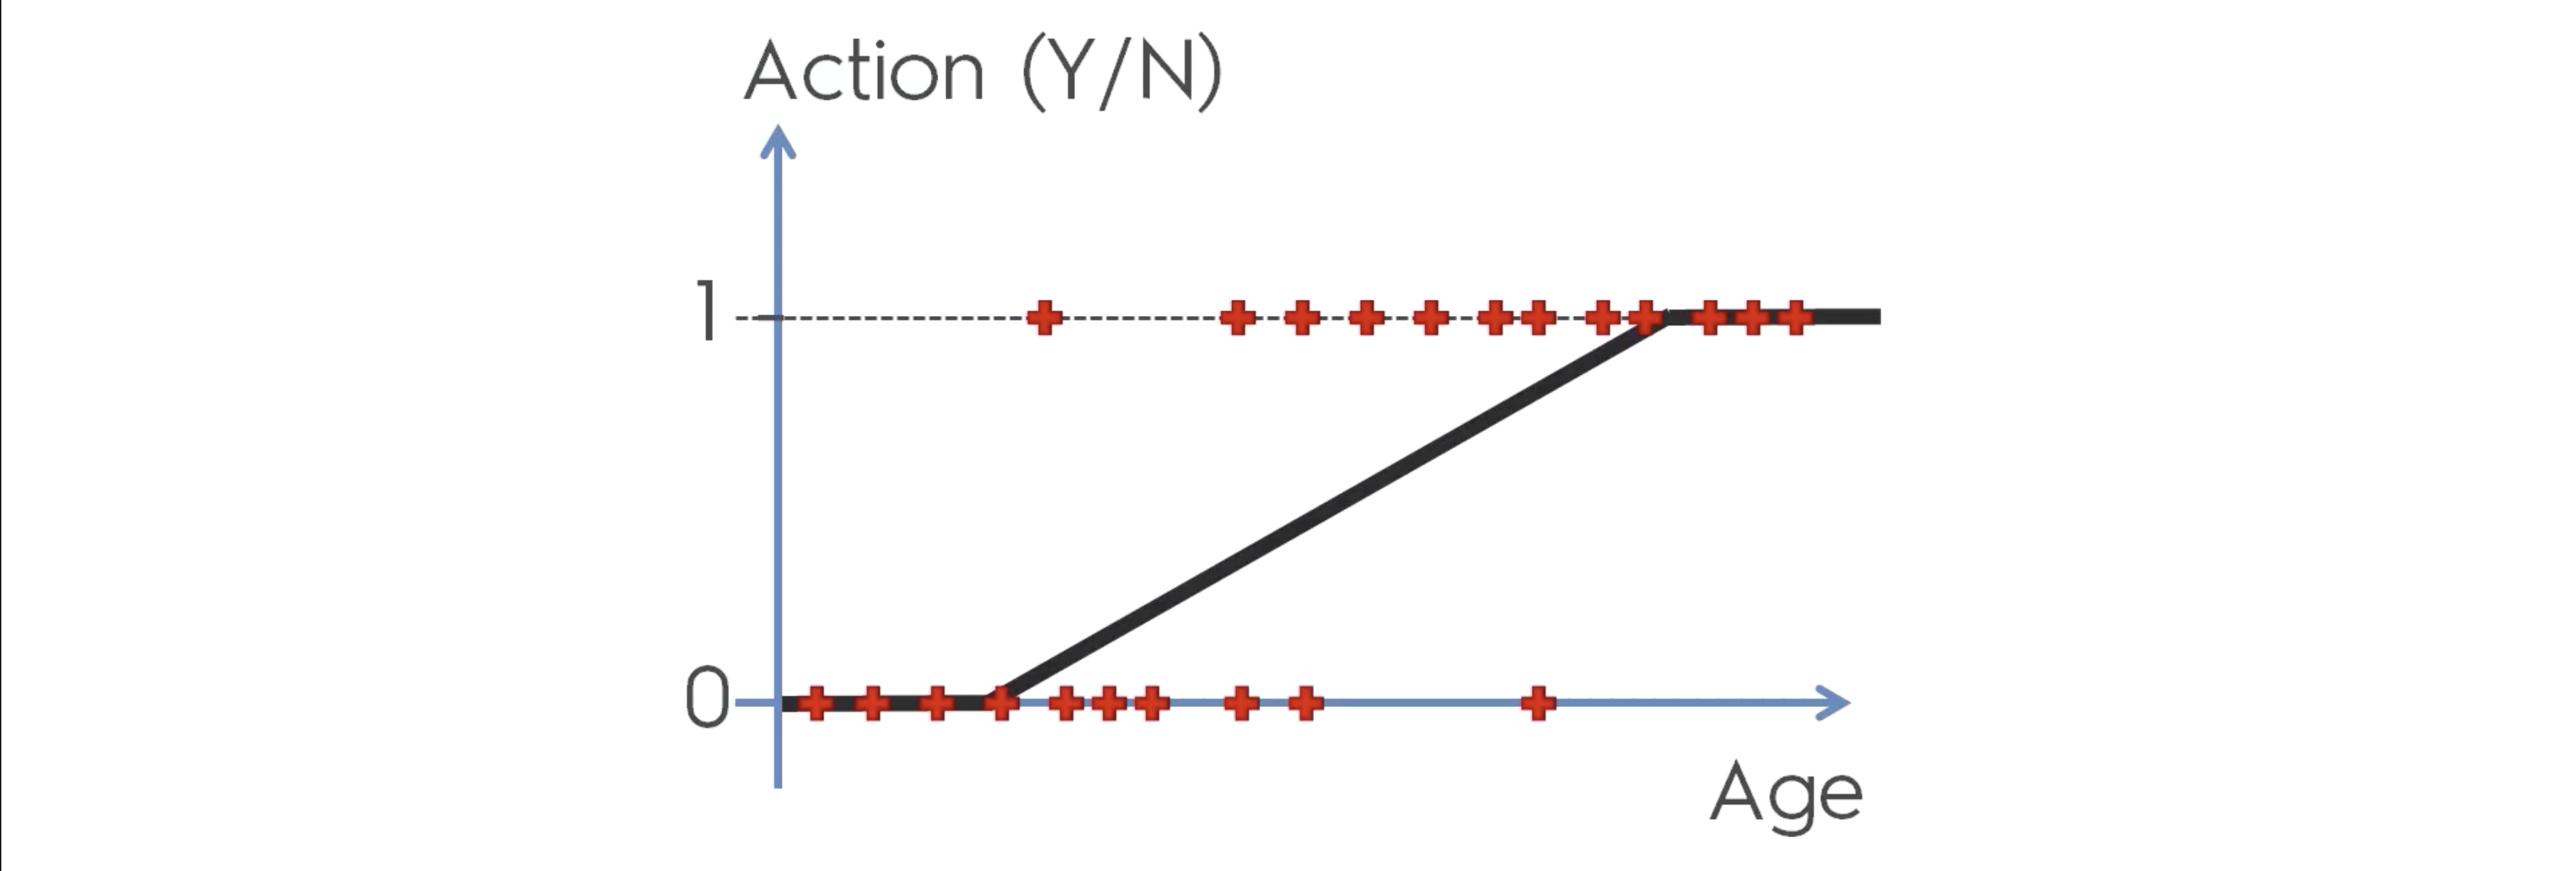

### Formula for logistic regression

The rigorus way of reframing the problem, is to use the sigmoid, or logistic function, hence the term logistic regression.

We started with a linear regression, fitting the data to the straight line

\begin{equation}
    y = b_0 + b_1 x.
\end{equation}

Now, we take the sigmoid function applied to $y$,

\begin{equation}
    p = \frac{1}{1 + e^{-y}}.
\end{equation}

Now solve for $y$ and equate to the line formula,

\begin{equation}
    \ln\left(\frac{p}{1 - p}\right) = b_0 + b_1 x.
\end{equation}

This is the formula for logistic regression, visually, we have performed the following.

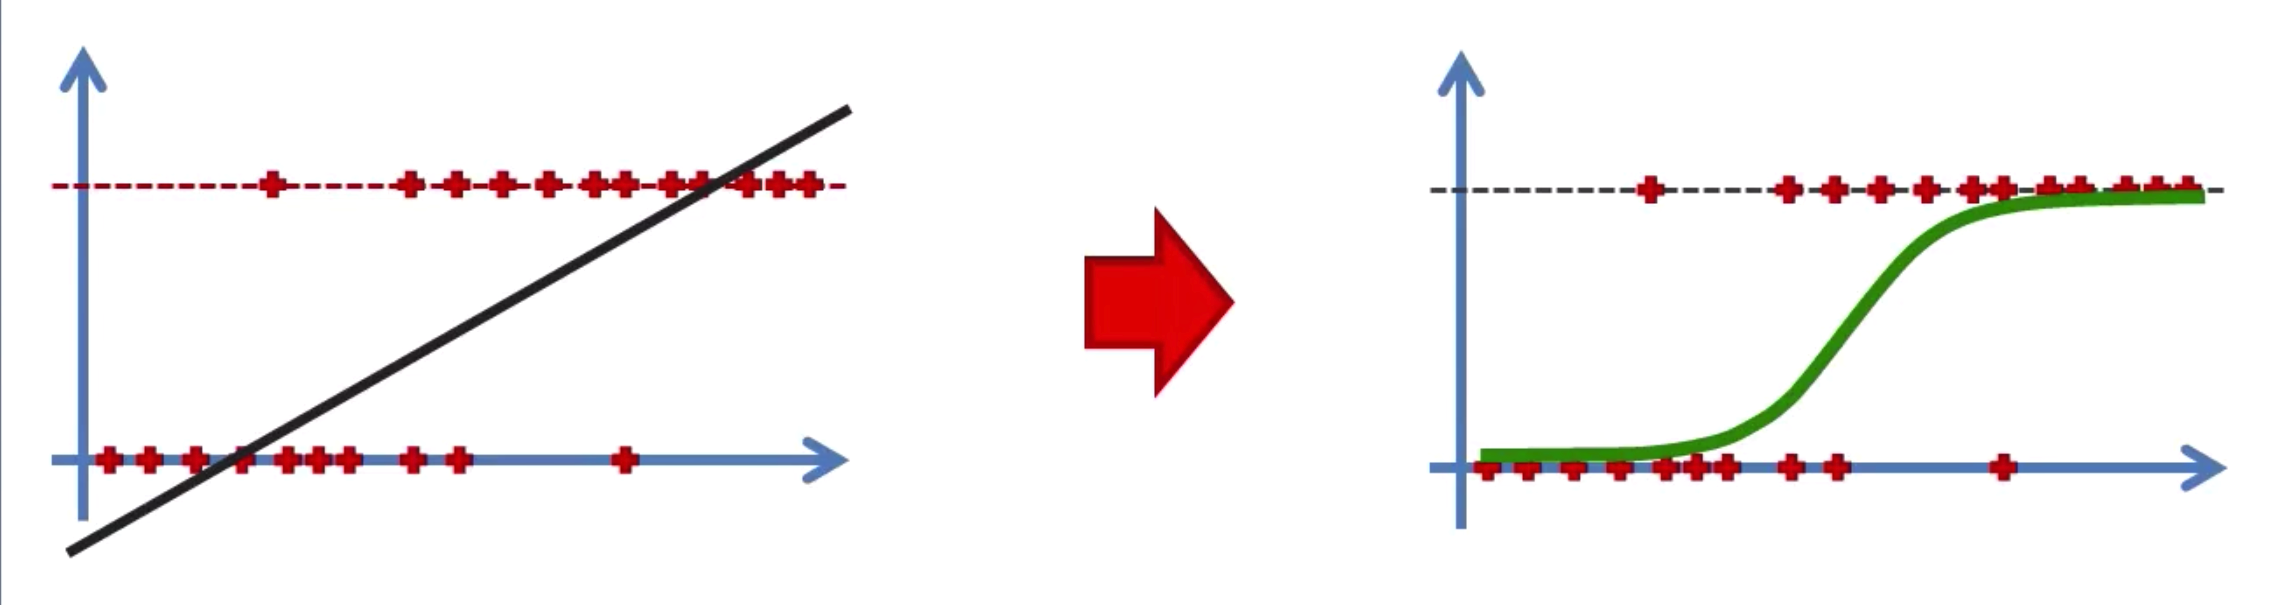


### Predicting new values

Lets say we want to predict the probability of a yes for some new ages. We simply project those ages vertically on to the curve and then horizontally to read off the predicted probability, $\hat{p}$.

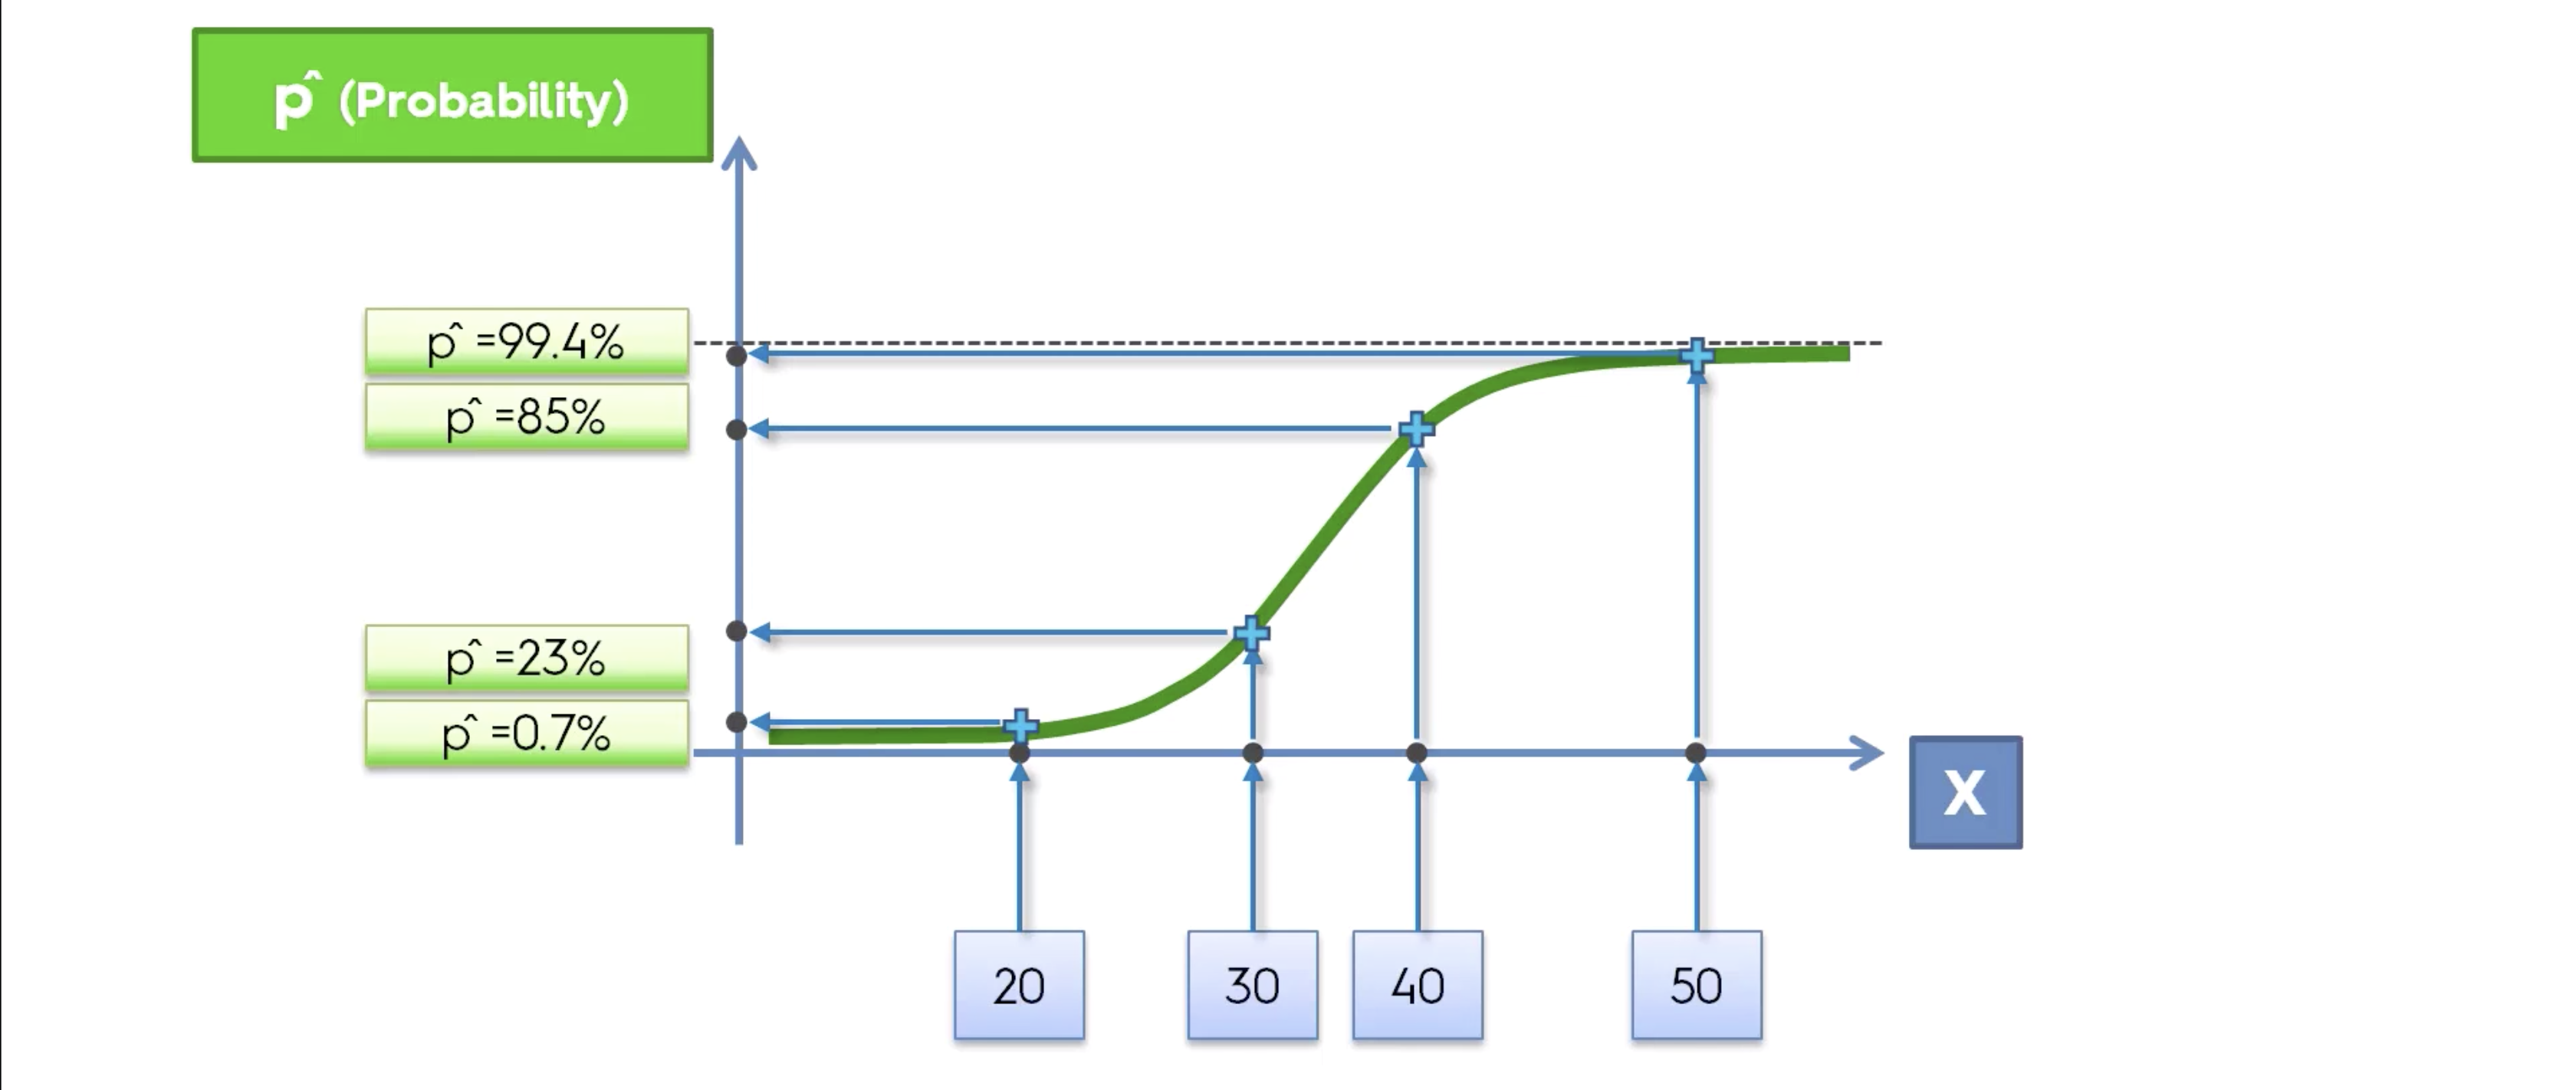

To get an actual prediction for the Dependent Variable (DV), $\hat{y}$. The approach is quite arbitrary. We choose some threshold, usually $0.5$, and project the probabilities above or below this line to $0$ or $1$, respectively.

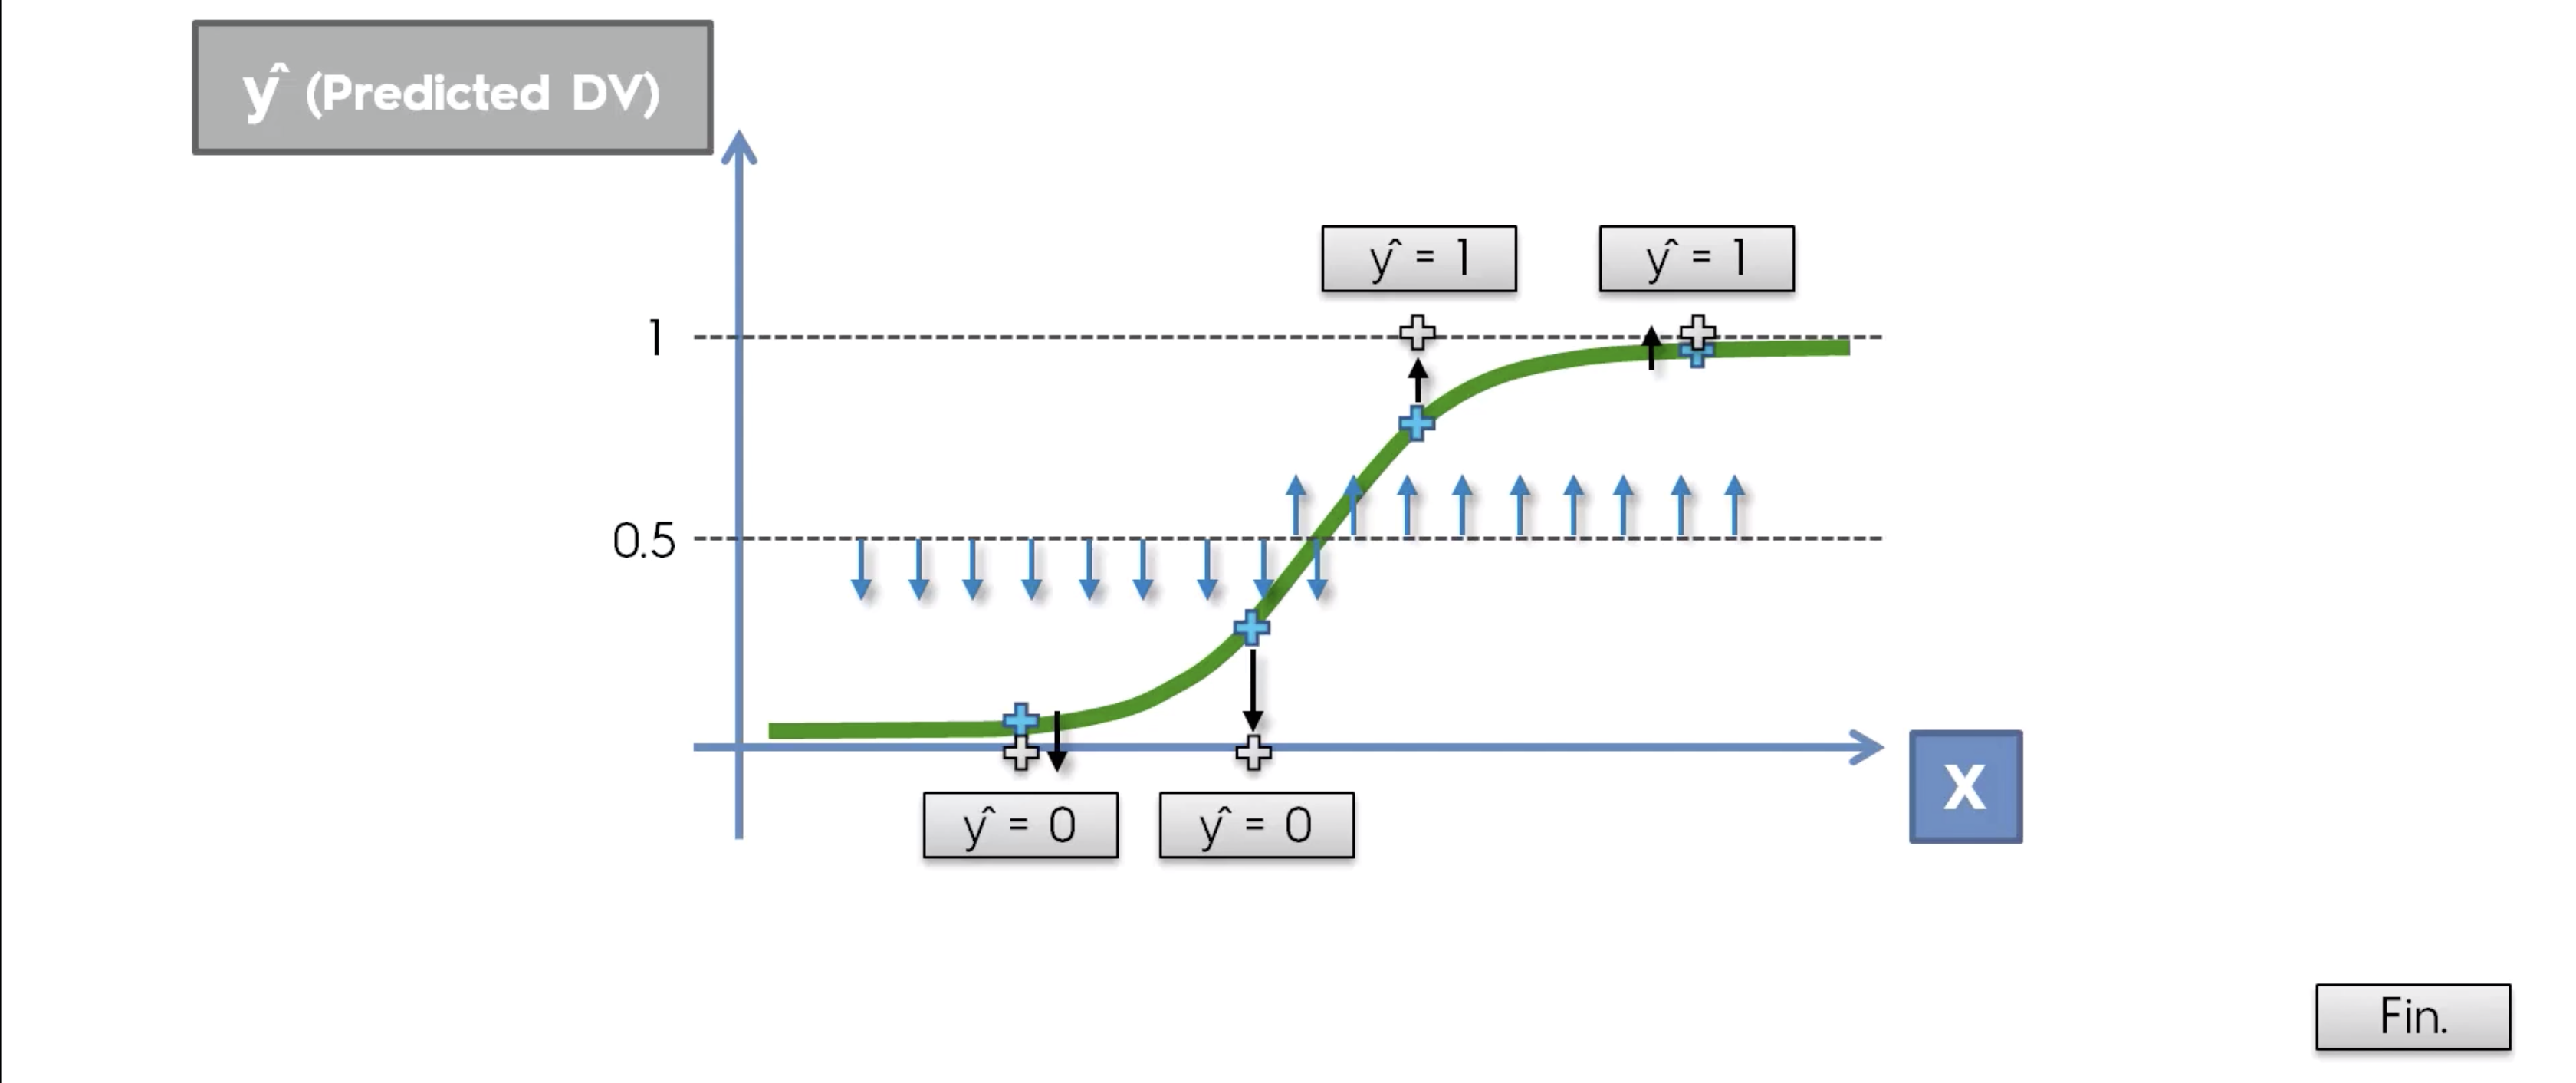

## Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Selecting the independent and dependent variables

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting Logistic Regression to the Training set

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) # ensure we always get the same result
classifier.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predicting test set results

Get vector of predictions.

In [12]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

## Making the Confusion Matrix

Create matrix that captures the correct and incorrect predictions of our $\hat{y}$.

In [13]:
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

So, we got 65 True Negatives, 24 True Positivies, 8 False Negatives, and 3 False Positives.

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


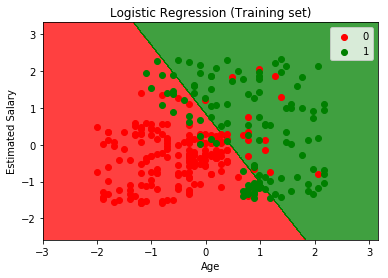

In [20]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

# Prepare an empty grid of pixels
X1, X2 = np.meshgrid(np.arange(start= X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start= X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Apply the classifier on all the pixel points
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Plot the actual data
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The plot here shows the predicted classifier via the coloured regions, with the actual data shown by the points. The prediction boundary in 2D (Age and Estimated Salary) is shown to be a straight line, i.e. our logistic regression classifier is a linear classifier. Note that quite a few green data points fall outside the green region, as the linear regressor is struggling to capture these points.

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


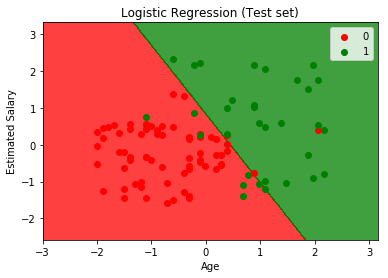

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
# Prepare an empty grid of pixels
X1, X2 = np.meshgrid(np.arange(start= X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start= X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Apply the classifier on all the pixel points
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Plot the actual data
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()